# MLSpace - Song Popularity Prediction

## Exploratory data analysis (EDA)

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-song-mlspace/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-song-mlspace/main/data/raw/test.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
#shape of train dataset

train.shape

(40000, 15)

There is 13 features + id + song_popularity

In [5]:
#columns

train.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [6]:
# data tyes - train

train.dtypes

id                    int64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
song_popularity       int64
dtype: object

In [7]:
# data tyes - train

train.dtypes.value_counts()

float64    11
int64       4
dtype: int64

In [8]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


In [9]:
#shape of test dataset

test.shape

(10000, 14)

In [10]:
# data tyes - test

test.dtypes

id                    int64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [11]:
# data tyes - test

test.dtypes.value_counts()

float64    11
int64       3
dtype: int64

# 3. Analysis

## 3.1 General EDA

In [12]:
#general statistics - train

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,19999.500000,11547.149720,0.000000,9999.750000,19999.500000,29999.250000,39999.000000
song_duration_ms,35899.0,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
acousticness,36008.0,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
danceability,35974.0,0.570951,0.190010,0.043961,0.424760,0.608234,0.718464,0.957131
energy,36025.0,0.683932,0.212662,-0.001682,0.539276,0.704453,0.870503,1.039741
instrumentalness,36015.0,0.036527,0.150024,-0.004398,0.000941,0.001974,0.003225,1.075415
key,35935.0,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,35914.0,0.198514,0.151670,0.027843,0.111796,0.135945,0.212842,1.065298
loudness,36043.0,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
audio_mode,40000.0,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
#general statistics - test

test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
song_duration_ms,9043.0,193091.108813,46502.319884,25377.000000,166689.000000,186196.000000,215059.000000,448558.000000
acousticness,9050.0,0.280280,0.299971,-0.013585,0.042181,0.141564,0.493003,1.046311
danceability,9024.0,0.569817,0.190177,0.064548,0.426734,0.605759,0.715491,0.946831
energy,8945.0,0.683552,0.212561,0.020959,0.541975,0.700278,0.870670,1.031383
instrumentalness,9000.0,0.036588,0.151470,-0.003344,0.000930,0.001964,0.003165,1.020970
key,9008.0,5.012544,3.387481,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,8994.0,0.196379,0.149440,0.034516,0.111599,0.135997,0.208563,1.003777
loudness,8974.0,-7.422145,3.902743,-29.887298,-9.654517,-6.346205,-4.605297,-0.879306
audio_mode,10000.0,0.323800,0.467948,0.000000,0.000000,0.000000,1.000000,1.000000


In [14]:
#columns with null - train

null_count_train = train.isnull().sum()
null_count_train[null_count_train > 0]

song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
dtype: int64

In [15]:
#columns with null - test

null_count_test = test.isnull().sum()
null_count_test[null_count_test > 0]

song_duration_ms     957
acousticness         950
danceability         976
energy              1055
instrumentalness    1000
key                  992
liveness            1006
loudness            1026
dtype: int64

### 1. song_duration_ms

The duration of the track in milliseconds.

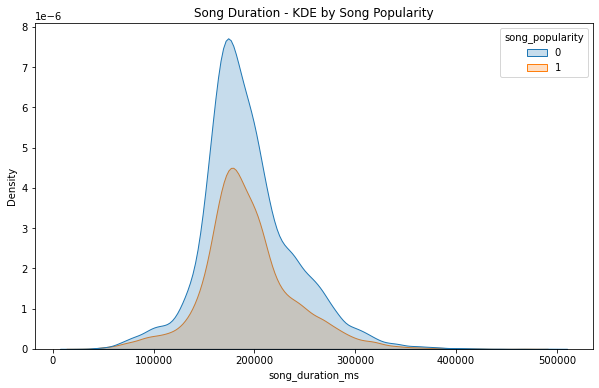

In [16]:
#Song Duration - KDE by Song Popularity - Train

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="song_duration_ms",data=train,hue='song_popularity',palette="tab10",fill=True)
plt.title('Song Duration - KDE by Song Popularity')
plt.show()

<AxesSubplot:xlabel='song_popularity', ylabel='song_duration_ms'>

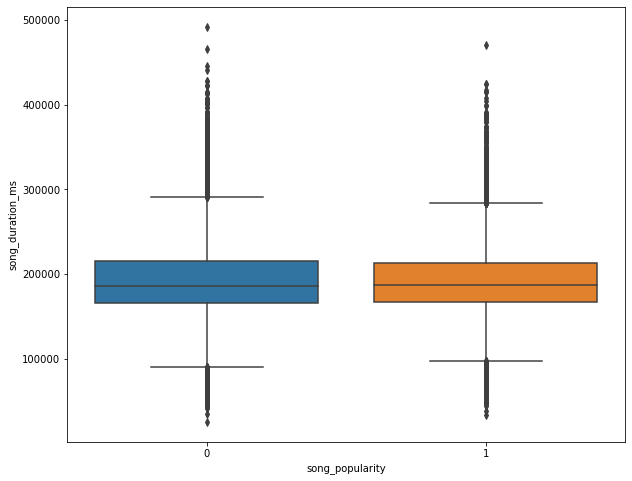

In [17]:
#Site EUI - Boxplot by Song Popularity

fig = plt.figure(figsize=(10,8))
sns.boxplot(x="song_popularity", y="song_duration_ms", data=train)

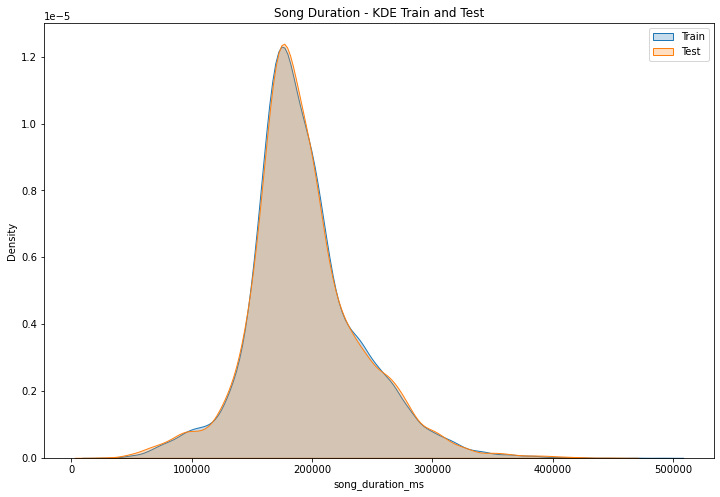

In [36]:
#Song Duration - KDE - Test

fig = plt.figure(figsize=(12,8))
sns.kdeplot(x="song_duration_ms",data=train,palette="tab10",fill=True,label='Train')
sns.kdeplot(x="song_duration_ms",data=test,palette="tab10",fill=True,label='Test')
plt.title('Song Duration - KDE Train and Test')
plt.legend()
plt.show()

### 2. acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

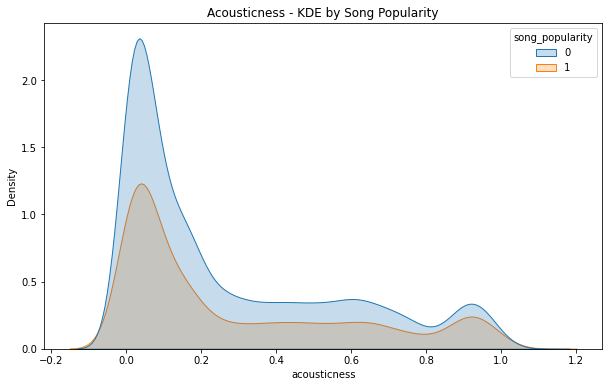

In [19]:
#acousticness - KDE by Song Popularity - Train

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="acousticness",data=train,hue='song_popularity',palette="tab10",fill=True)
plt.title('Acousticness - KDE by Song Popularity')
plt.show()

<AxesSubplot:xlabel='song_popularity', ylabel='acousticness'>

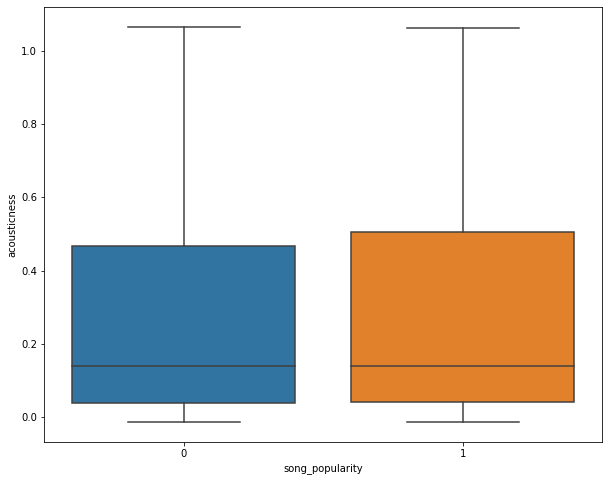

In [20]:
#acousticness - Boxplot by Song Popularity

fig = plt.figure(figsize=(10,8))
sns.boxplot(x="song_popularity", y="acousticness", data=train)

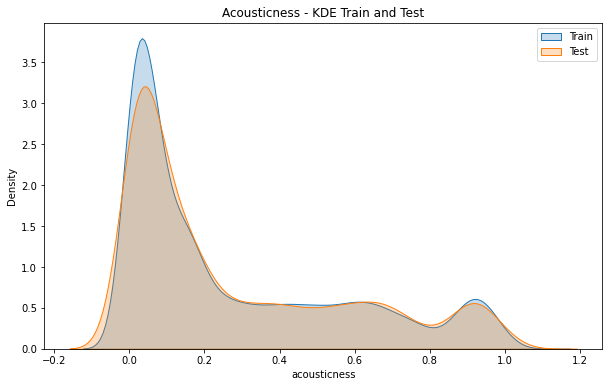

In [43]:
#acousticness - KDE - Test

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="acousticness",data=train,palette="tab10",fill=True,label='Train')
sns.kdeplot(x="acousticness",data=test,palette="tab10",fill=True,label='Test')
plt.title('Acousticness - KDE Train and Test')
plt.legend()
plt.show()

### 3. danceability

Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

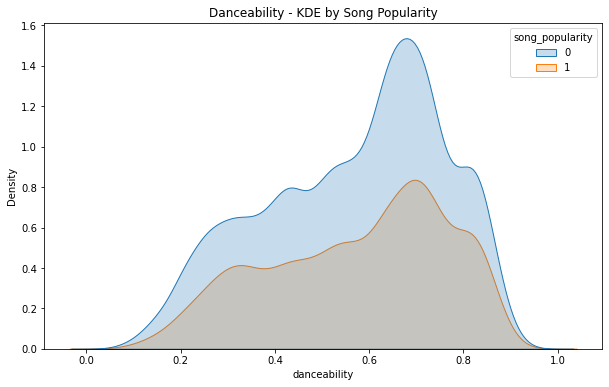

In [23]:
#danceability - KDE by Song Popularity - Train

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="danceability",data=train,hue='song_popularity',palette="tab10",fill=True)
plt.title('Danceability - KDE by Song Popularity')
plt.show()

<AxesSubplot:xlabel='song_popularity', ylabel='danceability'>

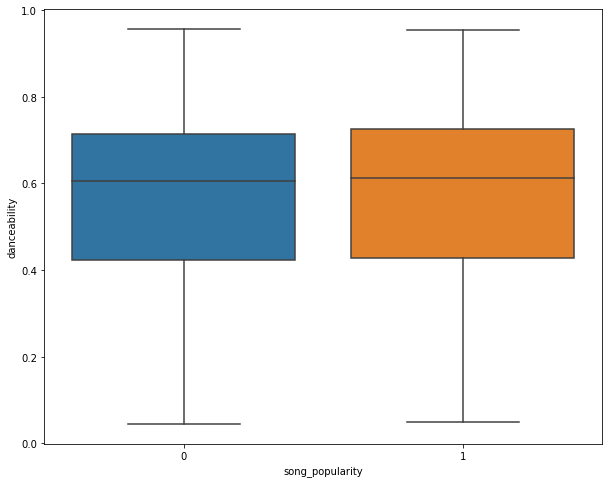

In [24]:
#danceability - Boxplot by Song Popularity

fig = plt.figure(figsize=(10,8))
sns.boxplot(x="song_popularity", y="danceability", data=train)

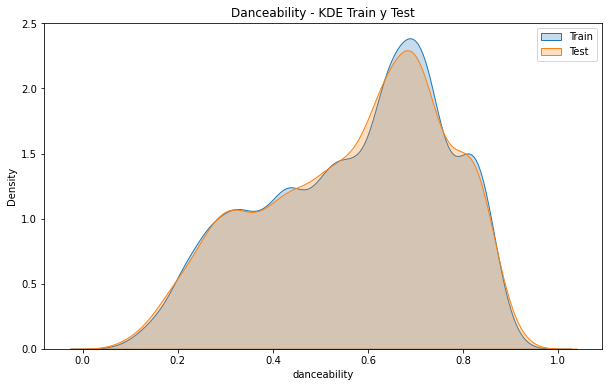

In [50]:
#acousticness - KDE - Test

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="danceability",data=train,palette="tab10",fill=True,label='Train')
sns.kdeplot(x="danceability",data=test,palette="tab10",fill=True,label='Test')
plt.title('Danceability - KDE Train y Test')
plt.legend()
plt.show()

### 4. energy

Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

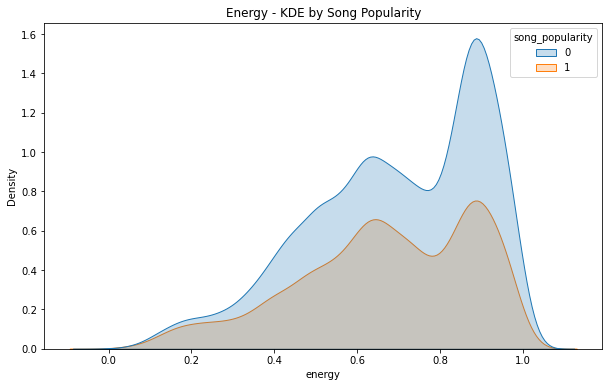

In [46]:
#energy - KDE by Song Popularity - Train

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="energy",data=train,hue='song_popularity',palette="tab10",fill=True)
plt.title('Energy - KDE by Song Popularity')
plt.show()

<AxesSubplot:xlabel='song_popularity', ylabel='energy'>

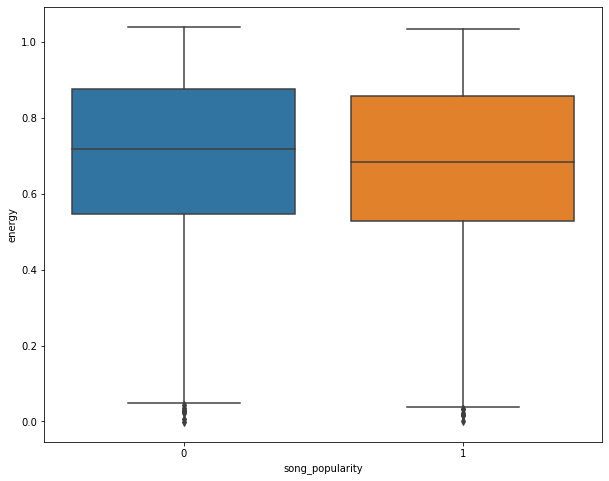

In [47]:
#energy - Boxplot by Song Popularity

fig = plt.figure(figsize=(10,8))
sns.boxplot(x="song_popularity", y="energy", data=train)

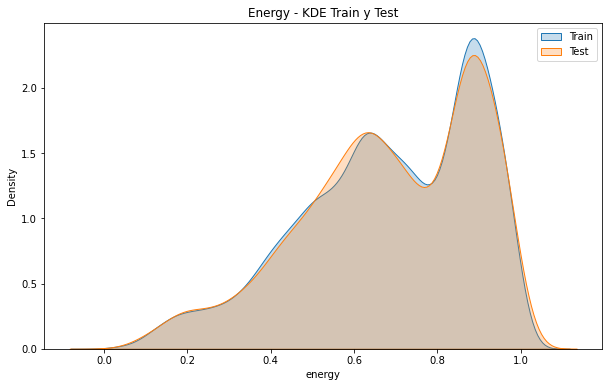

In [49]:
#energy - KDE - Test

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="energy",data=train,palette="tab10",fill=True,label='Train')
sns.kdeplot(x="energy",data=test,palette="tab10",fill=True,label='Test')
plt.title('Energy - KDE Train y Test')
plt.legend()
plt.show()

### 5. instrumentalness

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

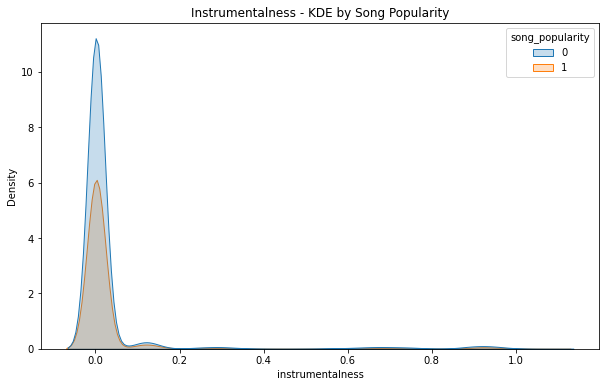

In [55]:
#instrumentalness - KDE by Song Popularity - Train

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="instrumentalness",data=train,hue='song_popularity',palette="tab10",fill=True)
plt.title('Instrumentalness - KDE by Song Popularity')
plt.show()

<AxesSubplot:xlabel='song_popularity', ylabel='instrumentalness'>

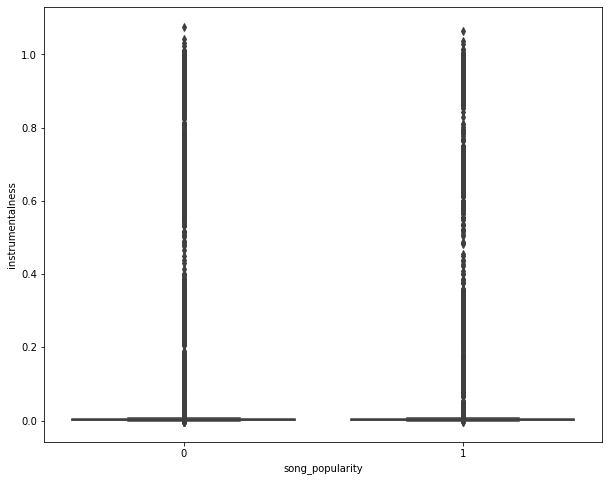

In [56]:
#instrumentalness - Boxplot by Song Popularity

fig = plt.figure(figsize=(10,8))
sns.boxplot(x="song_popularity", y="instrumentalness", data=train)

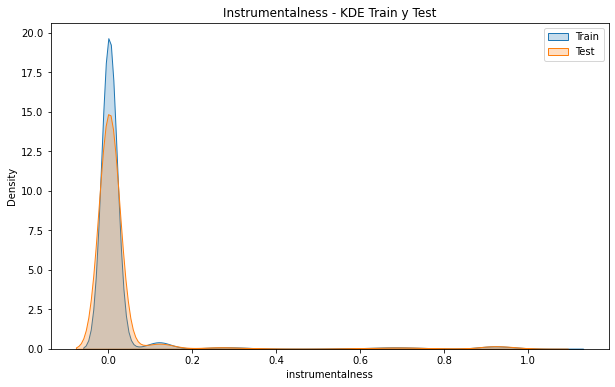

In [57]:
#instrumentalness - KDE - Test

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="instrumentalness",data=train,palette="tab10",fill=True,label='Train')
sns.kdeplot(x="instrumentalness",data=test,palette="tab10",fill=True,label='Test')
plt.title('Instrumentalness - KDE Train y Test')
plt.legend()
plt.show()

### 6. key

The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

<AxesSubplot:xlabel='key', ylabel='count'>

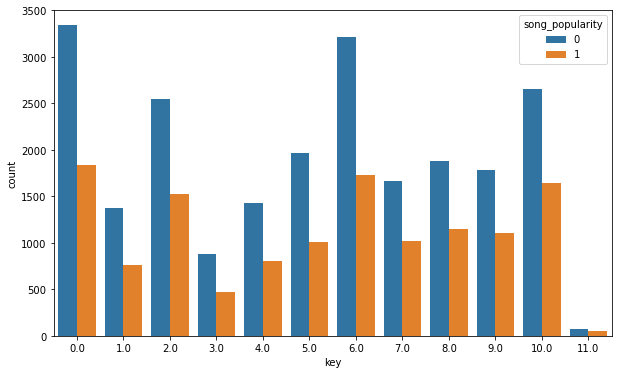

In [61]:
#count key sy song popularity

fig = plt.figure(figsize=(10,6))
sns.countplot(x="key",hue='song_popularity',data=train)
plt.title('Key - Count by Song Popularity')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Test')

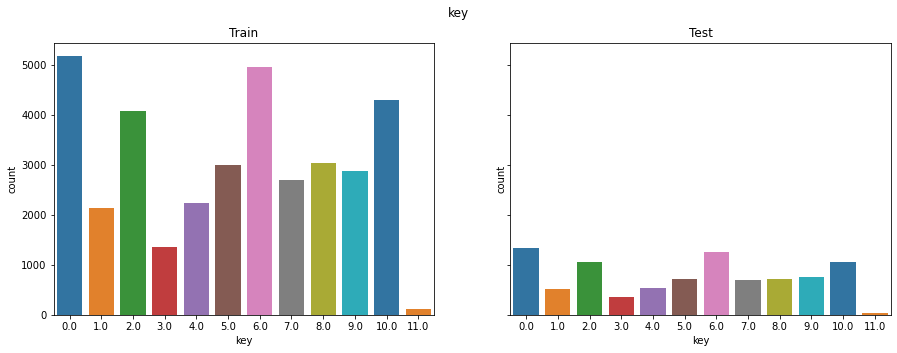

In [63]:
#count by key

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('key')


sns.countplot(ax=ax[0],x="key",data=train,palette="tab10")
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="key",data=test,palette="tab10")
ax[1].set_title('Test')